<a href="https://colab.research.google.com/github/ankitarashmi/EVAAssignments/blob/master/FourthIteration_Seesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


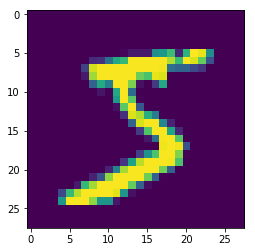

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#Normalization of Pixels


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Adding DropOut and Learning rate for this model 
Changes made:

1.Added drop outs with 0.25 value.

2.Learning rate of 0.003

3.Changing the Batch size to 512.

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) #(26,26,12) RF:3X3
model.add(BatchNormalization())
model.add(Convolution2D(14, 3, 3, activation='relu')) #(24,24,14) RF:5X5
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #(22,22,16) RF:7X7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D())
model.add(Convolution2D(12, 1, activation='relu'))  #(11,11,12) RF :7X7
model.add(BatchNormalization())

model.add(Convolution2D(14, 3,3, activation='relu')) #(9,9,14) RF:9X9
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#(7,7,16) RF:13X13
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10,7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 14)        1526      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2032      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

#Accuracy of 99.42
#Number of parameters: 12,896


In [0]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=50,validation_data=(X_test,Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0445 - val_acc: 0.9925
Epoch 2/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0387 - val_acc: 0.9930
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0408 - val_acc: 0.9933
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.0398 - val_acc: 0.9935
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0424 - val_acc: 0.9930
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010 - acc: 0.9996 - val_loss: 0.0433 - val_acc: 0.9929
Epoch 7/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0423 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04809795364980216, 0.9938]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.13339981e-35 1.06146399e-25 1.54273283e-23 1.88697815e-20
  3.30226808e-32 1.72958765e-28 0.00000000e+00 1.00000000e+00
  1.27903208e-33 1.39269449e-25]
 [7.79626727e-17 1.86904702e-12 1.00000000e+00 3.69900073e-24
  3.98296332e-16 5.44692932e-32 1.59901821e-17 2.29361220e-22
  1.02728857e-25 5.55711724e-24]
 [7.64906734e-23 1.00000000e+00 1.18068374e-19 3.77380889e-19
  2.30429435e-14 2.61251388e-13 1.30398510e-18 6.93510597e-14
  1.76173105e-20 3.24981556e-19]
 [1.00000000e+00 6.17217838e-25 4.58219607e-23 9.57159836e-23
  3.36507108e-27 1.88556689e-21 5.14465857e-14 2.91168344e-26
  7.41645018e-22 2.79735443e-17]
 [3.62062257e-26 2.43864632e-19 1.41342871e-25 3.27437726e-28
  1.00000000e+00 5.27178930e-28 1.73240681e-21 7.75609644e-26
  1.60461411e-26 1.12204820e-12]
 [6.42623202e-25 1.00000000e+00 3.34583184e-20 1.26679662e-24
  4.25854814e-16 3.01629116e-20 7.72097532e-24 8.26948915e-13
  4.85025921e-24 2.46731457e-21]
 [1.87031429e-37 1.64965987e-21 4.06423269e-31 4.00502298e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f6b101b9630>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7f6b7c1172e8>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7f6b1f0791d0>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7f6b1e854e48>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7f6b1062ba58>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7f6b1059f6d8>,
 'batch_normalization_6': <keras.layers.normalization.BatchNormalization at 0x7f6b104c9940>,
 'batch_normalization_7': <keras.layers.normalization.BatchNormalization at 0x7f6b10456e10>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f6b6cc3b048>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f6b1f0790f0>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f6b1079b048>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7f6b105f8e80>,
 'conv2d_5

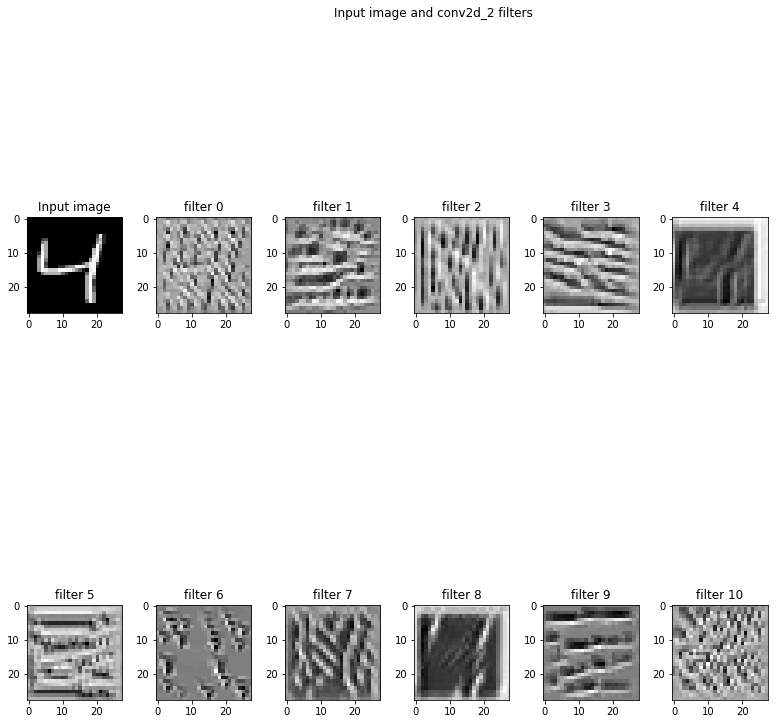

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()